In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
!git clone -q https://github.com/xelaphon/solar-cup.git
building_index = pd.read_csv("solar-cup/CSUN_Buildings_to_be_Analyzed_V2.csv", header = 0,
                             names = ['energy_abbreviation','map_abbreviation', 'building_name'])
load_data_kW = pd.read_csv("solar-cup/CSUN_15_min_Load_Data_V2_kW.csv", low_memory = False)
load_data_kWh = pd.read_csv("solar-cup/CSUN_15_min_Load_Data_V2_kWh.csv", low_memory = False)

In [ ]:
#Jan 1 2022 was a Saturday
#Assign Monday 1 - Sunday 7
first_day = 6

In [ ]:
load_data_kW.head()
for k in range(4, 37):
  name = load_data_kW.columns[k]
load_data_kW[load_data_kW.columns[4:37]]

,ADC,AR,BB,BH,BK,BP,CR,CS,CY,ED,...,PL: E6,PPM,PS: B3,PS: B5,PS: G3,RE,SH,SQ,ST,UN
0,47.0kW,11.6kW,44.4kW,77.0kW,59.2kW,3.1kW,NaN,106.8kW,24.4kW,63.2kW,...,0.0kW,45.7kW,50.4kW,24.8kW,25.2kW,154.5kW,68.5kW,153.2kW,14.7kW,42.1kW
1,46.6kW,12.0kW,46.6kW,78.0kW,62.5kW,1.5kW,NaN,101.0kW,29.8kW,69.0kW,...,0.0kW,46.5kW,50.8kW,24.8kW,25.2kW,164.5kW,68.0kW,162.3kW,14.8kW,41.0kW
2,48.1kW,11.0kW,48.9kW,78.4kW,58.7kW,1.4kW,NaN,121.0kW,23.9kW,63.7kW,...,0.0kW,47.2kW,51.1kW,24.7kW,25.7kW,156.5kW,70.1kW,156.0kW,14.6kW,41.2kW
3,48.7kW,7.5kW,47.9kW,78.8kW,65.6kW,0.0kW,NaN,104.9kW,30.1kW,64.6kW,...,0.0kW,47.7kW,52.3kW,24.7kW,26.1kW,156.3kW,67.1kW,159.6kW,14.9kW,40.8kW
4,48.3kW,7.7kW,48.5kW,78.7kW,60.7kW,0.8kW,NaN,107.8kW,23.5kW,64.0kW,...,0.0kW,47.0kW,50.8kW,24.8kW,25.8kW,158.4kW,67.7kW,155.2kW,14.8kW,40.9kW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,55.6kW,10.0kW,45.5kW,75.7kW,69.7kW,1.4kW,62.9kW,77.0kW,24.6kW,61.8kW,...,0.0kW,46.3kW,59.7kW,23.6kW,30.1kW,199.6kW,73.1kW,141.1kW,15.2kW,38.9kW
35036,50.4kW,12.4kW,45.6kW,74.9kW,68.7kW,1.4kW,52.3kW,116.7kW,24.7kW,61.4kW,...,0.0kW,45.5kW,58.3kW,23.4kW,30.3kW,248.0kW,71.2kW,134.2kW,15.2kW,37.8kW
35037,50.9kW,15.2kW,47.7kW,74.0kW,58.2kW,1.3kW,41.7kW,105.4kW,23.7kW,63.4kW,...,0.0kW,45.8kW,60.3kW,23.5kW,30.1kW,295.8kW,73.7kW,142.1kW,14.7kW,38.2kW
35038,52.0kW,12.4kW,47.1kW,77.0kW,56.6kW,1.4kW,31.6kW,97.6kW,24.1kW,62.1kW,...,0.0kW,46.7kW,60.1kW,23.5kW,30.1kW,238.0kW,71.0kW,143.3kW,14.8kW,39.4kW


In [ ]:
kWh_all = np.zeros(35040)
for k in range(4, 41):
  name = load_data_kWh.columns[k]
  for i in range(35040):
    num = load_data_kWh[name][i]
    if(type(num) == float):
      num = "0"
    kWh_all[i] = kWh_all[i] + float(num.split("kWh")[0])

In [ ]:
kWh_all_index = np.transpose(np.array((load_data_kWh["Month"], load_data_kWh["Hour"], np.zeros(35040), kWh_all)))
kWh_all_index[1][2]

0.0

In [ ]:
day = first_day
for k in range(35040):
  kWh_all_index[k][2] = day
  day = day + 1
  if day > 7:
    day = 1
kWh_all_index

array([[  1. ,  12. ,   6. , 944.8],
       [  1. ,  12. ,   7. , 513.4],
       [  1. ,  12. ,   1. , 517.5],
       ...,
       [ 12. ,  11. ,   1. , 565. ],
       [ 12. ,  11. ,   2. , 568.2],
       [ 12. ,  11. ,   3. , 525. ]])

In [ ]:
hour = 0
minute = 0
for k in range(35040):
  kWh_all_index[k][1] = hour
  minute = minute + 15
  if minute == 60:
    hour = hour + 1
    minute = 0
  if hour == 24:
    hour = 0
kWh_all_index

array([[  1. ,   0. ,   6. , 944.8],
       [  1. ,   0. ,   7. , 513.4],
       [  1. ,   0. ,   1. , 517.5],
       ...,
       [ 12. ,  23. ,   1. , 565. ],
       [ 12. ,  23. ,   2. , 568.2],
       [ 12. ,  23. ,   3. , 525. ]])

In [ ]:
load_data_kW.head()

,Month,Day,Hour,Minute,ADC,AR,BB,BH,BK,BP,...,PL: E6,PPM,PS: B3,PS: B5,PS: G3,RE,SH,SQ,ST,UN
0,1,1,12,0,47.0kW,11.6kW,44.4kW,77.0kW,59.2kW,3.1kW,...,0.0kW,45.7kW,50.4kW,24.8kW,25.2kW,154.5kW,68.5kW,153.2kW,14.7kW,42.1kW
1,1,1,12,15,46.6kW,12.0kW,46.6kW,78.0kW,62.5kW,1.5kW,...,0.0kW,46.5kW,50.8kW,24.8kW,25.2kW,164.5kW,68.0kW,162.3kW,14.8kW,41.0kW
2,1,1,12,30,48.1kW,11.0kW,48.9kW,78.4kW,58.7kW,1.4kW,...,0.0kW,47.2kW,51.1kW,24.7kW,25.7kW,156.5kW,70.1kW,156.0kW,14.6kW,41.2kW
3,1,1,12,45,48.7kW,7.5kW,47.9kW,78.8kW,65.6kW,0.0kW,...,0.0kW,47.7kW,52.3kW,24.7kW,26.1kW,156.3kW,67.1kW,159.6kW,14.9kW,40.8kW
4,1,1,1,0,48.3kW,7.7kW,48.5kW,78.7kW,60.7kW,0.8kW,...,0.0kW,47.0kW,50.8kW,24.8kW,25.8kW,158.4kW,67.7kW,155.2kW,14.8kW,40.9kW


In [ ]:
load_data_kWh.head()

,Month,Day,Hour,Minute,ADC,AR,BB,BH,BK,BP,...,PS: G3,RE,SC,SH,SQ,SRC,ST,UN,USU,VPAC
0,1,1,12,0,11.5kWh,2.4kWh,11.1kWh,18.0kWh,60.6kWh,0.4kWh,...,6.5kWh,39.5kWh,14.5kWh,16.5kWh,38.0kWh,70.5kWh,3.7kWh,10.0kWh,332.7kWh,32.0kWh
1,1,1,12,15,11.8kWh,2.4kWh,11.6kWh,20.0kWh,43.5kWh,0.3kWh,...,6.5kWh,41.0kWh,NaN,17.0kWh,39.0kWh,NaN,3.7kWh,10.0kWh,NaN,30.0kWh
2,1,1,12,30,11.8kWh,2.3kWh,12.2kWh,20.0kWh,45.0kWh,0.4kWh,...,6.4kWh,38.5kWh,NaN,17.5kWh,40.0kWh,NaN,3.7kWh,10.5kWh,NaN,28.0kWh
3,1,1,12,45,11.3kWh,2.3kWh,12.0kWh,20.0kWh,40.5kWh,0.4kWh,...,6.1kWh,39.5kWh,NaN,17.0kWh,39.0kWh,NaN,3.7kWh,10.0kWh,NaN,28.0kWh
4,1,1,1,0,12.0kWh,2.4kWh,12.1kWh,20.0kWh,41.5kWh,0.4kWh,...,6.4kWh,40.0kWh,17.0kWh,17.0kWh,39.0kWh,70.9kWh,3.7kWh,10.5kWh,332.7kWh,28.0kWh


In [ ]:
energy_charge = np.zeros(35040)

2061.2 7787.8 6057.100000000001 1850.6 2229.1 18682.4


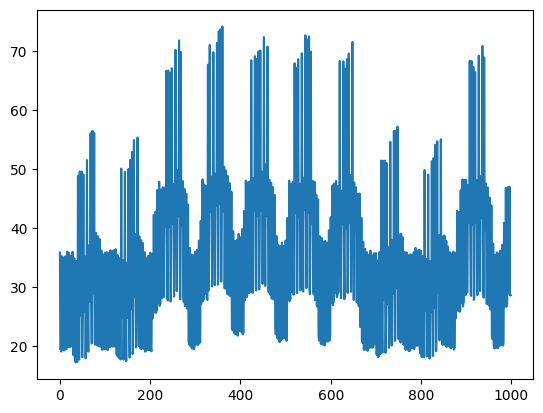

In [ ]:
max_summer_high = 0
max_summer_low = 0
max_summer_base = 0
max_winter_high = 0
max_winter_low = 0
max_winter_base = 0
for k in range(35040):
  month = kWh_all_index[k][0]
  hour = kWh_all_index[k][1]
  day = kWh_all_index[k][2]
  kWh = kWh_all_index[k][3]
  if(month >= 6 and month <= 9):
    if(day < 6 and hour >= 13 and hour < 17):
      energy_charge[k] = 0.05991*kWh
      if kWh > max_summer_high:
        max_summer_high = kWh
    elif((day < 6 and hour >= 10 and hour < 13) or (day < 6 and hour >= 17 and hour <20)):
      energy_charge[k] = 0.05365*kWh
      if kWh > max_summer_low:
        max_summer_low = kWh
    else:
      energy_charge[k] = 0.03356*kWh
      if kWh > max_summer_base:
        max_summer_base = kWh
  else:
    if(day < 6 and hour >= 13 and hour < 17):
      energy_charge[k] = 0.05464*kWh
      if kWh > max_winter_high:
        max_winter_high = kWh
    elif((day < 6 and hour >= 10 and hour < 13) or (day < 6 and hour >= 17 and hour <20)):
      energy_charge[k] = 0.05464*kWh
      if kWh > max_winter_low:
        max_winter_low = kWh
    else:
      energy_charge[k] = 0.03798*kWh
      if kWh > max_winter_base:
        max_winter_base = kWh
plt.plot(range(1000), energy_charge[:1000])
print(max_summer_high, max_summer_low, max_summer_base, max_winter_high, max_winter_low, max_winter_base)
#must include kW

In [ ]:
print(len(load_data_kWh.columns))

41


In [ ]:
load_data_kWh.columns

Index(['Month', 'Day', 'Hour', 'Minute', 'ADC', 'AR', 'BB', 'BH', 'BK', 'BP',
       'CR', 'CS', 'CY', 'ED', 'EH', 'JD', 'JR', 'LL', 'LO', 'MDF', 'MG', 'MZ',
       'NC: H', 'NC: R', 'NH', 'OV', 'PL: B2', 'PL: E6', 'PPM', 'PS: B3',
       'PS: B5', 'PS: G3', 'RE', 'SC', 'SH', 'SQ', 'SRC', 'ST', 'UN', 'USU',
       'VPAC'],
      dtype='object')

In [ ]:
temp_threes = np.transpose(np.array([load_data_kW["OV"], load_data_kW["RE"], load_data_kWh["USU"]]))
for k in range(35040):
  for b in range(3):
    if(type(temp_threes[k][b]) == float):
      temp_threes[k][b] = "0"
three = np.zeros((35040, 3))
counter = 0
for k in range(35040):
  three[k][0] = float(temp_threes[k][0].split("kW")[0])
  three[k][1] = float(temp_threes[k][1].split("kW")[0])
  # print(load_data_kWh["USU"][k])
  three[k][2] = float(temp_threes[k-counter][2].split("kWh")[0])
  counter = counter + 1
  if counter == 4:
    counter = 0
print(three)
three_buildings = pd.DataFrame(data = three, columns = ["OV", "RE", "USU"])
three_buildings.head()
three_buildings.to_csv("OV_RE_USU.csv", index = False)

[[151.9 154.5 332.7]
 [133.9 164.5 332.7]
 [132.  156.5 332.7]
 ...
 [204.3 295.8 219.3]
 [188.  238.  219.3]
 [206.3 195.2 219.3]]


In [ ]:
load_data_kWh.columns

columns = np.array(["Month", "Day", "Hour", "Minute", "Week", "Art and Design Center, ADC", "Arbor Grill, AR", "Bookstein Hall, BB", "Bayramian Hall, BH", "Campus Store Complex, BK",
"Donald Bianchi Planetarium, BP", "Chaparral Hall, CR", "Citrus Hall, CS", "Cypress Hall, CY", "Education, ED",
"Eucalyptus Hall, EH", "Jacaranda Hall, JD", "Jerome Richfield Hall, JR", "Lilac Hall, LL", "Live Oak Hall, LO",
"Main Distribution Facility, MDF", "Magnolia Hall, MG", "Manzanita Hall, MZ", "North Campus Hill Top, NC: H",
"North Campus Rydell, NC: R", "Nordhoff Hall, NH", "University Library, OV", "Parking Lot B2, PL: B2", "Parking Lot E6, PL: E6",
"Physical Plant Management, PPM", "Parking Structure B3, PS: B3", "Parking Structure B5, PS:B5", "Parking Structure G3, PS: G3",
"Redwood Hall, RE", "Sierra Center, SC", "Sierra Hall, SH", "Sequoia Hall, SQ", "Student Recreation Center, SRC",
"Sierra Tower, ST", "Valera Hall, UN", "University Student Union, USU", "The Soraya, VPAC", "EV Charging, EV"])
len(columns)

43

In [ ]:
hours = np.zeros(35040)
minutes = np.zeros(35040)
months = np.zeros(35040)
days = np.zeros(35040)
weeks = np.zeros(35040)
hour = 0
minute = 0
day = 1
week = first_day
for k in range(35040):
  hours[k] = hour
  minutes[k] = minute
  weeks[k] = week
  days[k] = day
  minute = minute + 15
  if minute == 60:
    hour = hour + 1
    minute = 0
  if hour == 24:
    hour = 0
    week = week + 1
  if week > 7:
     week = 1
  months[k] = float(load_data_kWh["Month"][k])
  days[k] = float(load_data_kWh["Day"][k])

In [ ]:
kWh_cleaned = np.zeros((35040, 43))
for k in range(4, 41):
  name = load_data_kWh.columns[k]
  for i in range(35040):
    num = load_data_kWh[name][i]
    if(type(num) == float):
      num = "0"
    kWh_cleaned[i][k+1] = float(num.split("kWh")[0])
kWh_cleaned

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 3.327e+02, 3.200e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 3.000e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.800e+01,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e-01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e-01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e-01,
        0.000e+00]])

In [ ]:
print(kWh_cleaned[:,34])
counter = 0
temp = 0
for k in range(35040):
  if counter == 0:
    temp = kWh_cleaned[k][34]
  kWh_cleaned[k][34] = temp/4
  counter = counter + 1
  if counter == 4:
    counter = 0
kWh_cleaned[:, 34]

[14.5  0.   0.  ...  0.   0.   0. ]


array([3.625, 3.625, 3.625, ..., 6.425, 6.425, 6.425])

In [ ]:
print(kWh_cleaned[:,37])
counter = 0
temp = 0
for k in range(35040):
  if counter == 0:
    temp = kWh_cleaned[k][37]
  kWh_cleaned[k][37] = temp/4
  counter = counter + 1
  if counter == 4:
    counter = 0
kWh_cleaned[:, 37]

[70.5  0.   0.  ...  0.   0.   0. ]


array([17.625, 17.625, 17.625, ..., 12.425, 12.425, 12.425])

In [ ]:
print(kWh_cleaned[:,40])
counter = 0
temp = 0
for k in range(35040):
  if counter == 0:
    temp = kWh_cleaned[k][40]
  kWh_cleaned[k][40] = temp/4
  counter = counter + 1
  if counter == 4:
    counter = 0
kWh_cleaned[:, 40]

[332.7   0.    0.  ...   0.    0.    0. ]


array([83.175, 83.175, 83.175, ..., 54.825, 54.825, 54.825])

In [ ]:
kWh_clean_df = pd.DataFrame(kWh_cleaned, columns = columns)

In [ ]:
kWh_clean_df["Month"] = months
kWh_clean_df["Day"] = days
kWh_clean_df["Hour"] = hours
kWh_clean_df["Minute"] = minutes
kWh_clean_df["Week"] = weeks

In [ ]:
kWh_clean_df

,Month,Day,Hour,Minute,Week,"Art and Design Center, ADC","Arbor Grill, AR","Bookstein Hall, BB","Bayramian Hall, BH","Campus Store Complex, BK",...,"Redwood Hall, RE","Sierra Center, SC","Sierra Hall, SH","Sequoia Hall, SQ","Student Recreation Center, SRC","Sierra Tower, ST","Valera Hall, UN","University Student Union, USU","The Soraya, VPAC","EV Charging, EV"
0,1.0,1.0,0.0,0.0,6.0,11.5,2.4,11.1,18.0,60.6,...,39.5,3.625,16.5,38.0,17.625,3.7,10.0,83.175,32.0,0.0
1,1.0,1.0,0.0,15.0,6.0,11.8,2.4,11.6,20.0,43.5,...,41.0,3.625,17.0,39.0,17.625,3.7,10.0,83.175,30.0,0.0
2,1.0,1.0,0.0,30.0,6.0,11.8,2.3,12.2,20.0,45.0,...,38.5,3.625,17.5,40.0,17.625,3.7,10.5,83.175,28.0,0.0
3,1.0,1.0,0.0,45.0,6.0,11.3,2.3,12.0,20.0,40.5,...,39.5,3.625,17.0,39.0,17.625,3.7,10.0,83.175,28.0,0.0
4,1.0,1.0,1.0,0.0,6.0,12.0,2.4,12.1,20.0,41.5,...,40.0,4.250,17.0,39.0,17.725,3.7,10.5,83.175,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,12.0,31.0,22.0,45.0,6.0,12.0,2.9,11.4,18.0,17.5,...,43.5,6.675,16.5,66.0,16.750,3.8,9.5,54.825,0.1,0.0
35036,12.0,31.0,23.0,0.0,6.0,13.0,2.9,11.4,17.0,30.0,...,56.5,6.425,17.0,32.0,12.425,3.8,9.0,54.825,0.1,0.0
35037,12.0,31.0,23.0,15.0,6.0,11.8,3.1,11.9,18.0,14.0,...,103.5,6.425,17.0,33.0,12.425,3.7,9.0,54.825,0.1,0.0
35038,12.0,31.0,23.0,30.0,6.0,13.0,3.0,11.8,35.0,14.0,...,62.5,6.425,16.5,33.0,12.425,3.7,9.0,54.825,0.1,0.0


In [ ]:
ev_charging = pd.read_csv("solar-cup/CSUN_EV_Charging_Profile.csv", low_memory = False)

In [ ]:
ev_charging

,Timestamp,EV Charging (kW),kWh
0,2022-01-01T00:00:00.000000,0.0,0.0
1,2022-01-01T00:15:00.000000,0.0,0.0
2,2022-01-01T00:30:00.000000,0.0,0.0
3,2022-01-01T00:45:00.000000,0.0,0.0
4,2022-01-01T01:00:00.000000,0.0,0.0
...,...,...,...
35035,2022-12-31T22:45:00.000000,12.8,3.2
35036,2022-12-31T23:00:00.000000,15.1,3.8
35037,2022-12-31T23:15:00.000000,9.0,2.2
35038,2022-12-31T23:30:00.000000,10.0,2.5


In [ ]:
  kWh_clean_df["EV Charging, EV"] = ev_charging["kWh"]

In [ ]:
kWh_clean_df

,Month,Day,Hour,Minute,Week,"Art and Design Center, ADC","Arbor Grill, AR","Bookstein Hall, BB","Bayramian Hall, BH","Campus Store Complex, BK",...,"Redwood Hall, RE","Sierra Center, SC","Sierra Hall, SH","Sequoia Hall, SQ","Student Recreation Center, SRC","Sierra Tower, ST","Valera Hall, UN","University Student Union, USU","The Soraya, VPAC","EV Charging, EV"
0,1.0,1.0,0.0,0.0,6.0,11.5,2.4,11.1,18.0,60.6,...,39.5,3.625,16.5,38.0,17.625,3.7,10.0,83.175,32.0,0.0
1,1.0,1.0,0.0,15.0,6.0,11.8,2.4,11.6,20.0,43.5,...,41.0,3.625,17.0,39.0,17.625,3.7,10.0,83.175,30.0,0.0
2,1.0,1.0,0.0,30.0,6.0,11.8,2.3,12.2,20.0,45.0,...,38.5,3.625,17.5,40.0,17.625,3.7,10.5,83.175,28.0,0.0
3,1.0,1.0,0.0,45.0,6.0,11.3,2.3,12.0,20.0,40.5,...,39.5,3.625,17.0,39.0,17.625,3.7,10.0,83.175,28.0,0.0
4,1.0,1.0,1.0,0.0,6.0,12.0,2.4,12.1,20.0,41.5,...,40.0,4.250,17.0,39.0,17.725,3.7,10.5,83.175,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,12.0,31.0,22.0,45.0,6.0,12.0,2.9,11.4,18.0,17.5,...,43.5,6.675,16.5,66.0,16.750,3.8,9.5,54.825,0.1,3.2
35036,12.0,31.0,23.0,0.0,6.0,13.0,2.9,11.4,17.0,30.0,...,56.5,6.425,17.0,32.0,12.425,3.8,9.0,54.825,0.1,3.8
35037,12.0,31.0,23.0,15.0,6.0,11.8,3.1,11.9,18.0,14.0,...,103.5,6.425,17.0,33.0,12.425,3.7,9.0,54.825,0.1,2.2
35038,12.0,31.0,23.0,30.0,6.0,13.0,3.0,11.8,35.0,14.0,...,62.5,6.425,16.5,33.0,12.425,3.7,9.0,54.825,0.1,2.5


In [ ]:
temp = 45
for k in range(35038):
  if temp == 45:
    temp = -15
  current = int(str(ev_charging["Timestamp"][k])[14:16])
  if temp + 15 != current:
    print(k)
    print(ev_charging["Timestamp"][k])
    print(temp)
  temp = temp + 15

In [ ]:
for k in range(35040):
  if kWh_clean_df["Campus Store Complex, BK"][k] > 500:
    print(k)
    print(kWh_clean_df["Campus Store Complex, BK"][k])
3040
5693
5692
9357
9356
20122
20123
25392
25393
25394
25395
25396
33467
33468

33322
613.5


33468

In [ ]:
for b in range(5, 42):
  col = columns[b]
  print(col)
  temp_building = np.array(kWh_clean_df[col])
  print(np.max(temp_building))
#campus store complex
#jacaranda?
#mdf?
#mz
#psb3
#vpac

Art and Design Center, ADC
65.0
Arbor Grill, AR
24.6
Bookstein Hall, BB
58.2
Bayramian Hall, BH
101.0
Campus Store Complex, BK
613.5
Donald Bianchi Planetarium, BP
11.3
Chaparral Hall, CR
118.2
Citrus Hall, CS
122.2
Cypress Hall, CY
220.5
Education, ED
65.2
Eucalyptus Hall, EH
76.7
Jacaranda Hall, JD
1098.3
Jerome Richfield Hall, JR
75.3
Lilac Hall, LL
66.0
Live Oak Hall, LO
54.3
Main Distribution Facility, MDF
880.5
Magnolia Hall, MG
53.5
Manzanita Hall, MZ
418.6
North Campus Hill Top, NC: H
3.8
North Campus Rydell, NC: R
11.2
Nordhoff Hall, NH
69.7
University Library, OV
1028.0
Parking Lot B2, PL: B2
0.0
Parking Lot E6, PL: E6
423.2
Physical Plant Management, PPM
29.0
Parking Structure B3, PS: B3
6726.6
Parking Structure B5, PS:B5
21.1
Parking Structure G3, PS: G3
1099.6
Redwood Hall, RE
282.5
Sierra Center, SC
79.55
Sierra Hall, SH
236.5
Sequoia Hall, SQ
168.0
Student Recreation Center, SRC
219.25
Sierra Tower, ST
232.8
Valera Hall, UN
119.5
University Student Union, USU
135.25
The 

In [ ]:
kWh_clean_df.to_csv("kWh_clean.csv", index = False)

In [ ]:
kW_cleaned = np.zeros((35040, 43))
b = 5
for k in range(4, 37):
  name = load_data_kW.columns[k]
  if b == 34 or b == 37 or b == 40 or b == 41:
    print(kWh_clean_df.columns[b])
    b = b + 1
  for i in range(35040):
    num = load_data_kW[name][i]
    if(type(num) == float):
      num = "0"
    kW_cleaned[i][b] = float(num.split("kW")[0])
  b = b + 1


Sierra Center, SC
Student Recreation Center, SRC


In [ ]:
kW_clean_df = pd.DataFrame(kW_cleaned, columns = columns)

In [ ]:
kW_clean_df

,Month,Day,Hour,Minute,Week,"Art and Design Center, ADC","Arbor Grill, AR","Bookstein Hall, BB","Bayramian Hall, BH","Campus Store Complex, BK",...,"Redwood Hall, RE","Sierra Center, SC","Sierra Hall, SH","Sequoia Hall, SQ","Student Recreation Center, SRC","Sierra Tower, ST","Valera Hall, UN","University Student Union, USU","The Soraya, VPAC","EV Charging, EV"
0,0.0,0.0,0.0,0.0,0.0,47.0,11.6,44.4,77.0,59.2,...,154.5,0.0,68.5,153.2,0.0,14.7,42.1,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,46.6,12.0,46.6,78.0,62.5,...,164.5,0.0,68.0,162.3,0.0,14.8,41.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,48.1,11.0,48.9,78.4,58.7,...,156.5,0.0,70.1,156.0,0.0,14.6,41.2,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,48.7,7.5,47.9,78.8,65.6,...,156.3,0.0,67.1,159.6,0.0,14.9,40.8,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,48.3,7.7,48.5,78.7,60.7,...,158.4,0.0,67.7,155.2,0.0,14.8,40.9,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,0.0,0.0,0.0,0.0,0.0,55.6,10.0,45.5,75.7,69.7,...,199.6,0.0,73.1,141.1,0.0,15.2,38.9,0.0,0.0,0.0
35036,0.0,0.0,0.0,0.0,0.0,50.4,12.4,45.6,74.9,68.7,...,248.0,0.0,71.2,134.2,0.0,15.2,37.8,0.0,0.0,0.0
35037,0.0,0.0,0.0,0.0,0.0,50.9,15.2,47.7,74.0,58.2,...,295.8,0.0,73.7,142.1,0.0,14.7,38.2,0.0,0.0,0.0
35038,0.0,0.0,0.0,0.0,0.0,52.0,12.4,47.1,77.0,56.6,...,238.0,0.0,71.0,143.3,0.0,14.8,39.4,0.0,0.0,0.0


In [ ]:
kW_clean_df["EV Charging, EV"] = ev_charging["EV Charging (kW)"]
kW_clean_df["Month"] = months
kW_clean_df["Day"] = days
kW_clean_df["Hour"] = hours
kW_clean_df["Minute"] = minutes
kW_clean_df["Week"] = weeks
kW_clean_df

,Month,Day,Hour,Minute,Week,"Art and Design Center, ADC","Arbor Grill, AR","Bookstein Hall, BB","Bayramian Hall, BH","Campus Store Complex, BK",...,"Redwood Hall, RE","Sierra Center, SC","Sierra Hall, SH","Sequoia Hall, SQ","Student Recreation Center, SRC","Sierra Tower, ST","Valera Hall, UN","University Student Union, USU","The Soraya, VPAC","EV Charging, EV"
0,1.0,1.0,0.0,0.0,6.0,47.0,11.6,44.4,77.0,59.2,...,154.5,0.0,68.5,153.2,0.0,14.7,42.1,0.0,0.0,0.0
1,1.0,1.0,0.0,15.0,6.0,46.6,12.0,46.6,78.0,62.5,...,164.5,0.0,68.0,162.3,0.0,14.8,41.0,0.0,0.0,0.0
2,1.0,1.0,0.0,30.0,6.0,48.1,11.0,48.9,78.4,58.7,...,156.5,0.0,70.1,156.0,0.0,14.6,41.2,0.0,0.0,0.0
3,1.0,1.0,0.0,45.0,6.0,48.7,7.5,47.9,78.8,65.6,...,156.3,0.0,67.1,159.6,0.0,14.9,40.8,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,6.0,48.3,7.7,48.5,78.7,60.7,...,158.4,0.0,67.7,155.2,0.0,14.8,40.9,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,12.0,31.0,22.0,45.0,6.0,55.6,10.0,45.5,75.7,69.7,...,199.6,0.0,73.1,141.1,0.0,15.2,38.9,0.0,0.0,12.8
35036,12.0,31.0,23.0,0.0,6.0,50.4,12.4,45.6,74.9,68.7,...,248.0,0.0,71.2,134.2,0.0,15.2,37.8,0.0,0.0,15.1
35037,12.0,31.0,23.0,15.0,6.0,50.9,15.2,47.7,74.0,58.2,...,295.8,0.0,73.7,142.1,0.0,14.7,38.2,0.0,0.0,9.0
35038,12.0,31.0,23.0,30.0,6.0,52.0,12.4,47.1,77.0,56.6,...,238.0,0.0,71.0,143.3,0.0,14.8,39.4,0.0,0.0,10.0


kWh but no kW 'SC', 'SRC', 'USU', 'VPAC'

In [ ]:
SC_temp = np.array(kWh_clean_df["Sierra Center, SC"])
SRC_temp = np.array(kWh_clean_df["Student Recreation Center, SRC"])
USU_temp = np.array(kWh_clean_df["University Student Union, USU"])
VPAC_temp = np.array(kWh_clean_df["The Soraya, VPAC"])

In [ ]:
kW_clean_df["Sierra Center, SC"] = SC_temp * 4
kW_clean_df["Student Recreation Center, SRC"] = SRC_temp * 4
kW_clean_df["University Student Union, USU"] = USU_temp * 4
kW_clean_df["The Soraya, VPAC"] = VPAC_temp * 4
kW_clean_df

,Month,Day,Hour,Minute,Week,"Art and Design Center, ADC","Arbor Grill, AR","Bookstein Hall, BB","Bayramian Hall, BH","Campus Store Complex, BK",...,"Redwood Hall, RE","Sierra Center, SC","Sierra Hall, SH","Sequoia Hall, SQ","Student Recreation Center, SRC","Sierra Tower, ST","Valera Hall, UN","University Student Union, USU","The Soraya, VPAC","EV Charging, EV"
0,1.0,1.0,0.0,0.0,6.0,47.0,11.6,44.4,77.0,59.2,...,154.5,14.5,68.5,153.2,70.5,14.7,42.1,332.7,128.0,0.0
1,1.0,1.0,0.0,15.0,6.0,46.6,12.0,46.6,78.0,62.5,...,164.5,14.5,68.0,162.3,70.5,14.8,41.0,332.7,120.0,0.0
2,1.0,1.0,0.0,30.0,6.0,48.1,11.0,48.9,78.4,58.7,...,156.5,14.5,70.1,156.0,70.5,14.6,41.2,332.7,112.0,0.0
3,1.0,1.0,0.0,45.0,6.0,48.7,7.5,47.9,78.8,65.6,...,156.3,14.5,67.1,159.6,70.5,14.9,40.8,332.7,112.0,0.0
4,1.0,1.0,1.0,0.0,6.0,48.3,7.7,48.5,78.7,60.7,...,158.4,17.0,67.7,155.2,70.9,14.8,40.9,332.7,112.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,12.0,31.0,22.0,45.0,6.0,55.6,10.0,45.5,75.7,69.7,...,199.6,26.7,73.1,141.1,67.0,15.2,38.9,219.3,0.4,12.8
35036,12.0,31.0,23.0,0.0,6.0,50.4,12.4,45.6,74.9,68.7,...,248.0,25.7,71.2,134.2,49.7,15.2,37.8,219.3,0.4,15.1
35037,12.0,31.0,23.0,15.0,6.0,50.9,15.2,47.7,74.0,58.2,...,295.8,25.7,73.7,142.1,49.7,14.7,38.2,219.3,0.4,9.0
35038,12.0,31.0,23.0,30.0,6.0,52.0,12.4,47.1,77.0,56.6,...,238.0,25.7,71.0,143.3,49.7,14.8,39.4,219.3,0.4,10.0


In [ ]:
kW_clean_df.to_csv("kW_clean.csv", index = False)